In [0]:
pip install wordcloud

Python interpreter will be restarted.
  Using cached wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-e0b05b8f-35dd-4a52-b2c5-1b7021d70044/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [0]:
Reviews_pdf['dominant_topic_theme'].value_counts().reset_index()['index'].unique()

Out[13]: array(['Topic_19__Service_WaitingTime',
       'Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin',
       'Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken',
       'Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold',
       'Topic_5__Food_sushi__Service',
       'Topic_6__Place__Food_TurfnSurf_Taco_Gluten',
       'Topic_8__CustomerService_WaitingTime_PaymentRefund',
       'Topic_20__Environment_Decor_patio_lighting__Music',
       'Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view',
       'Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__Amazing place__Pleasure',
       'Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan',
       'Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server',
       'Topic_16__Payment_Comped',
       'Topic_1__Bad Service_Customer Emotions_frustrated_Payment_money'],
      dtype=object)

In [0]:
Reviews_pdf['Overall_Aspect'].value_counts().reset_index()['index'].unique()

Out[15]: array(['SERVICE#GENERAL', 'FOOD#QUALITY', 'RESTAURANT#GENERAL',
       'AMBIENCE#GENERAL', 'RESTAURANT#MISCELLANEOUS', 'LOCATION#GENERAL',
       'FOOD#STYLE_OPTIONS', 'RESTAURANT#PRICES'], dtype=object)

In [0]:
Reviews_pdf.columns

Out[16]: Index(['Aspect', 'Aspect_AMBIENCE_GENERAL', 'Aspect_DRINKS_PRICES',
       'Aspect_DRINKS_STYLE_OPTIONS', 'Aspect_FOOD_PRICES',
       'Aspect_FOOD_QUALITY', 'Aspect_FOOD_STYLE_OPTIONS', 'Aspect_Keywords',
       'Aspect_LOCATION_GENERAL', 'Aspect_RESTAURANT_GENERAL',
       'Aspect_RESTAURANT_MISCELLANEOUS', 'Aspect_RESTAURANT_PRICES',
       'Aspect_SENTIMENT_NEGATIVE', 'Aspect_SENTIMENT_NEUTRAL',
       'Aspect_SENTIMENT_POSITIVE', 'Aspect_SERVICE_GENERAL',
       'Aspect_Sentiment', 'Emotion', 'Emotion_anger', 'Emotion_fear',
       'Emotion_joy', 'Emotion_love', 'Emotion_sadness', 'Emotion_suprise',
       'Food_Entities', 'Overall_Aspect', 'Personality_ENFJ',
       'Personality_ENFP', 'Personality_ENTJ', 'Personality_ENTP',
       'Personality_ESFJ', 'Personality_ESFP', 'Personality_ESTJ',
       'Personality_ESTP', 'Personality_INFJ', 'Personality_INFP',
       'Personality_INTJ', 'Personality_INTP', 'Personality_ISFJ',
       'Personality_ISFP', 'Personality_ISTJ', 'P

### <a id='0'><h2 style="background-color:powderblue;border-radius:5px;text-align:center;padding:7px;color:steelblue;font-family:Garamond;">Personality Dashboard</h2></a>

In [0]:
DF = (spark.read
      .option("inferSchema", True).json("/FileStore/tables/Project_Data_Extract/Reviews_Final_Dashboard.json"))
spark.conf.set("spark.sql.execution.arrow.enabled", "false") 
Reviews_pdf=DF.toPandas()
Reviews_pdf

Aspect 
 Aspect_AMBIENCE_GENERAL 
 Aspect_DRINKS_PRICES 
 Aspect_DRINKS_STYLE_OPTIONS 
 Aspect_FOOD_PRICES 
 Aspect_FOOD_QUALITY 
 Aspect_FOOD_STYLE_OPTIONS 
 Aspect_Keywords 
 Aspect_LOCATION_GENERAL 
 Aspect_RESTAURANT_GENERAL 
 ... 
 sentiment_positive 
 sentiment_score 
 stars 
 stars_1 
 stars_2 
 stars_3 
 stars_4 
 stars_5 
 text_syntatics_cleaned 
 useful 
 
 
 
 
 0 
 [FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALIT... 
 0 
 0 
 0 
 0 
 3 
 0 
 [grubhub order sent chopstick soy sauce, would... 
 0 
 3 
 ... 
 0 
 -0.7506 
 1 
 1 
 0 
 0 
 0 
 0 
 ordered grubhubstaying hotel indicated order s... 
 0 
 
 
 1 
 [RESTAURANT#GENERAL, RESTAURANT#GENERAL, AMBIE... 
 1 
 0 
 0 
 0 
 1 
 0 
 [pleasant surprise, burn time, planned great a... 
 0 
 3 
 ... 
 1 
 0.9694 
 5 
 0 
 0 
 0 
 0 
 1 
 pleasant surprise whatever stopped ra burn tim... 
 0 
 
 
 2 
 [SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURA... 
 0 
 0 
 0 
 0 
 3 
 0 
 [always super, clean come time, always good, e... 
 0 
 6 
 ... 
 1 
 0.9842 
 5 
 0 
 0 
 0 
 0 
 1 
 love place atmosphere nice always super clean ... 
 0 
 
 
 3 
 [RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY] 
 0 
 0 
 0 
 0 
 2 
 0 
 [avocadofresh rice, loose small, portion roll ... 
 0 
 1 
 ... 
 0 
 0.0000 
 1 
 1 
 0 
 0 
 0 
 0 
 fish avocadofresh riceloose small portion roll... 
 1 
 
 
 4 
 [RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA... 
 0 
 0 
 0 
 0 
 1 
 0 
 [experience meal, card split bill couple minut... 
 0 
 9 
 ... 
 1 
 0.6249 
 2 
 0 
 1 
 0 
 0 
 0 
 girlfriend came two week ago quite experience ... 
 3 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 436 
 [FOOD#QUALITY, FOOD#STYLE_OPTIONS, FOOD#QUALIT... 
 0 
 0 
 0 
 0 
 4 
 1 
 [roll goyoza oz rice, tiny roll, taste old man... 
 0 
 2 
 ... 
 0 
 -0.7514 
 1 
 1 
 0 
 0 
 0 
 0 
 terrible ordered roll goyoza oz rice got tiny ... 
 0 
 
 
 437 
 [RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#... 
 1 
 0 
 0 
 0 
 1 
 0 
 [least time, must say, sushi ok host, rude ser... 
 0 
 5 
 ... 
 1 
 0.3535 
 2 
 0 
 1 
 0 
 0 
 0 
 whatever least time must say sushi ok host sta... 
 0 
 
 
 438 
 [SERVICE#GENERAL, SERVICE#GENERAL, SERVICE#GEN... 
 1 
 0 
 0 
 0 
 2 
 0 
 [table reservation, minute service, server nev... 
 0 
 3 
 ... 
 0 
 -0.5118 
 2 
 0 
 1 
 0 
 0 
 0 
 whatever sorry_about_that table reservation wa... 
 0 
 
 
 439 
 [RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#... 
 0 
 0 
 0 
 0 
 2 
 0 
 [place dozen time, really great, experience gr... 
 0 
 5 
 ... 
 1 
 0.8856 
 5 
 0 
 0 
 0 
 0 
 1 
 I visited place dozen time past year I really ... 
 0 
 
 
 440 
 [FOOD#QUALITY, FOOD#QUALITY, SERVICE#GENERAL, ... 
 0 
 0 
 0 
 0 
 2 
 0 
 [foodbland basic nothing, place sushi, decent ... 
 0 
 1 
 ... 
 0 
 -0.3089 
 2 
 0 
 1 
 0 
 0 
 0 
 foodbland basic nothing special place sushidec... 
 0 
 
 
 
 441 rows × 78 columns

In [0]:
DF.write.mode('overwrite').saveAsTable("PersonalityTable1")


In [0]:
dbutils.widgets.text("business_filter", "s7baMoiG1821_3NblCfK6w", "Enter your business id:")
dbutils.widgets.text("start_date", "2020-08-20", "Enter start date:")
dbutils.widgets.text("end_date", "2020-12-20", "Enter end date:")


In [0]:
dbutils.widgets.dropdown("stars_filter_above", "1", [str(x) for x in range(1,6)],'Filter rating(More than and equal to):')

In [0]:
dbutils.widgets.dropdown("stars_filter_below", "4", [str(x) for x in range(1,6)],'Filter rating(Less than and equal to):')

d
<img src="https://advertisingrow.com/wp-content/uploads/2019/09/Infographic-Myers-Briggs-Personality-Types.jpg">

<img src="https://assets.weforum.org/editor/3kl2hZ0guKiGPhEcTpiX794PB-1R9j3OlOfQtO8N1rE.JPG">

<img src="https://drive.google.com/file/d/1W4v5iyigN2CSdND9KysAE1OUXWjGw8TI/view">

In [0]:
%sql
SELECT Personality_ENFJ, Personality_ENFP, Personality_ENTJ,
       Personality_ENTP, Personality_ESFJ, Personality_ESFP,
       Personality_ESTJ, Personality_ESTP, Personality_INFJ,
       Personality_INFP, Personality_INTJ, Personality_INTP,
       Personality_ISFJ, Personality_ISFP, Personality_ISTJ,
       Personality_ISTP,date FROM personality_table
WHERE (business_id = getArgument('business_filter'))

Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP date 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2019-01-07 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-01-16 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2019-02-12 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-01-31 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-02-19 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2019-03-08 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-02-12 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-03-01 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-01-01 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-03-29 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-01-30 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2019-02-18 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-02-25 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-03-01 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-01-12 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-03-14 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-02-28 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-02-10 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-01-19 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-01-23 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2019-02-18 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-03-14 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2019-03-04 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-01-21 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-01-24 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-01-17 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-01-29 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-03-03 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-02-22 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-02-27 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-03-03 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-03-18 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-03-17 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2019-03-21 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-02-08 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2019-02-10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-05-30 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-05-28 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-04-29 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2019-05-25 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-05-01 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2019-06-01 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2019-06-22 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-06-22 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-04-03 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-05-10 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-04-23 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2019-06-18 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-05-20 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-05-05 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-05-08 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-05-24 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2019-05-26 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-04-14 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-05-06 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-06-28 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-05-03 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2019-06-28 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2019-06-18 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-04-18 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-06-29 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-05-27 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-04-13 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-05-20 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-05-30 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-06-01 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-05-18 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2019-05-26 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2019-06-16 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2019-04-02 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2019-06-03 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2019-05-31 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-04-14 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-05-20 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-05-30 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2019-05-19 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-06-09 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-06-04 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-06-23 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2019-04-29 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-07-08 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-09-27 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-09-01 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-09-15 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2019-07-09 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2019-07-09 0 0 0 0 0 0 0 0 0 0 0 0 0

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, AMBIENCE#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL) 1 0 0 0 7 0 [uber leave place, pork gyoza chicken yakisoba lobster spring roll chicken teriyaki udon gyoza,cold lobster, roll mehhh let, chicken yakisoba chicken, equally bad, chickeninedible think, chicken prepped frm, chicken breast, definitely lie, ate everything, chicken redeeming quality place, lovely attentive] 0 4 0 0 1 0 0 1 List(negative, neutral, neutral, neutral, neutral, negative, neutral, neutral, neutral, neutral, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [roll chicken teriyaki gyoza, lobster roll mehhh, chicken yakisoba chicken chicken, chickenchicken breast, everything chicken redeeming] List(roll, chickenteriyaki, gyoza, lobsterroll, chickenyakisoba, chickenbreast, chicken) FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-07 3 Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold 0 1 ISFJ positive 0 0 1 0.1796 1 1 0 0 0 0 s I posting review waiting uber leave place ordered pork gyoza chicken yakisoba lobster spring roll chicken teriyaki udon gyozacold lobster roll mehhh let u get awful chicken yakisoba chicken udon equally bad chickeninedible think defrosted bag warmed microwave spoke manager assured chickenprepped frm fresh chicken breast definitely lie starving ate everything around chicken redeeming quality placelovely attentive waitress niyara ra good 0 List(RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 2 0 [came happy, hour great place, show picture food, get salmon nigiri, presentation doe, bar everythingwonderful] 0 4 0 0 0 0 1 0 List(positive, positive, neutral, neutral, neutral, positive) joy 0 0 1 0 0 0 [salmon nigiri, doe flair bar] List(salmonnigiri, doe) AMBIENCE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-16 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_au

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, AMBIENCE#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL) 1 0 0 0 7 0 [uber leave place, pork gyoza chicken yakisoba lobster spring roll chicken teriyaki udon gyoza,cold lobster, roll mehhh let, chicken yakisoba chicken, equally bad, chickeninedible think, chicken prepped frm, chicken breast, definitely lie, ate everything, chicken redeeming quality place, lovely attentive] 0 4 0 0 1 0 0 1 List(negative, neutral, neutral, neutral, neutral, negative, neutral, neutral, neutral, neutral, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [roll chicken teriyaki gyoza, lobster roll mehhh, chicken yakisoba chicken chicken, chickenchicken breast, everything chicken redeeming] List(roll, chickenteriyaki, gyoza, lobsterroll, chickenyakisoba, chickenbreast, chicken) FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-07 3 Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold 0 1 ISFJ positive 0 0 1 0.1796 1 1 0 0 0 0 s I posting review waiting uber leave place ordered pork gyoza chicken yakisoba lobster spring roll chicken teriyaki udon gyozacold lobster roll mehhh let u get awful chicken yakisoba chicken udon equally bad chickeninedible think defrosted bag warmed microwave spoke manager assured chickenprepped frm fresh chicken breast definitely lie starving ate everything around chicken redeeming quality placelovely attentive waitress niyara ra good 0 List(RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 2 0 [came happy, hour great place, show picture food, get salmon nigiri, presentation doe, bar everythingwonderful] 0 4 0 0 0 0 1 0 List(positive, positive, neutral, neutral, neutral, positive) joy 0 0 1 0 0 0 [salmon nigiri, doe flair bar] List(salmonnigiri, doe) AMBIENCE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-16 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_au

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, AMBIENCE#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL) 1 0 0 0 7 0 [uber leave place, pork gyoza chicken yakisoba lobster spring roll chicken teriyaki udon gyoza,cold lobster, roll mehhh let, chicken yakisoba chicken, equally bad, chickeninedible think, chicken prepped frm, chicken breast, definitely lie, ate everything, chicken redeeming quality place, lovely attentive] 0 4 0 0 1 0 0 1 List(negative, neutral, neutral, neutral, neutral, negative, neutral, neutral, neutral, neutral, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [roll chicken teriyaki gyoza, lobster roll mehhh, chicken yakisoba chicken chicken, chickenchicken breast, everything chicken redeeming] List(roll, chickenteriyaki, gyoza, lobsterroll, chickenyakisoba, chickenbreast, chicken) FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-07 3 Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold 0 1 ISFJ positive 0 0 1 0.1796 1 1 0 0 0 0 s I posting review waiting uber leave place ordered pork gyoza chicken yakisoba lobster spring roll chicken teriyaki udon gyozacold lobster roll mehhh let u get awful chicken yakisoba chicken udon equally bad chickeninedible think defrosted bag warmed microwave spoke manager assured chickenprepped frm fresh chicken breast definitely lie starving ate everything around chicken redeeming quality placelovely attentive waitress niyara ra good 0 List(RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 2 0 [came happy, hour great place, show picture food, get salmon nigiri, presentation doe, bar everythingwonderful] 0 4 0 0 0 0 1 0 List(positive, positive, neutral, neutral, neutral, positive) joy 0 0 1 0 0 0 [salmon nigiri, doe flair bar] List(salmonnigiri, doe) AMBIENCE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-16 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_au

In [0]:
%sql
SELECT Personality_ENFJ, Personality_ENFP, Personality_ENTJ,
       Personality_ENTP, Personality_ESFJ, Personality_ESFP,
       Personality_ESTJ, Personality_ESTP, Personality_INFJ,
       Personality_INFP, Personality_INTJ, Personality_INTP,
       Personality_ISFJ, Personality_ISFP, Personality_ISTJ,
       Personality_ISTP,date FROM personality_table
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP date 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-08-23 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2020-08-27 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2020-08-28 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2020-08-21 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2020-08-23 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2020-09-21 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-09-15 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2020-09-21 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-08-25 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-09-07 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-09-06 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-10-17 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2020-10-24 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2020-11-04 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2020-10-02 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2020-10-12 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-11-01 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-12-13 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2020-11-03 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-11-20 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2020-11-14 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2020-11-16 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-10-10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2020-10-23 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2020-10-18 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-10-15 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2020-10-11 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2020-10-11 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-11-06 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2020-11-13 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2020-10-31 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-11-27 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2020-10-18 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2020-10-21 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2020-10-14 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2020-10-04 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020-11-01 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2020-10-25 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2020-11-09 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2020-11-01

In [0]:
%sql
SELECT * FROM personality_table
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_10__LocationParking__Food_sushi Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_13__Ambience__Food__Environment_Patio Topic_14__Overpriced__Ambience__Music Topic_15__DynamiteFood__Service__ScallopFood__MediocreFood Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotionsFrustrated_Payment Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_7__Environment_Interior_barLighting_RedBlackTheme__Food_sushi_smoked__Service Topic_8__CustomerService_WaitingTime_PaymentRefund Topic_9__GroupWaiting_Crowd__Time__Rating business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.33 0.0 0.33 0.0 0.0 0.0 0.0 0.0 0.26 0.0 0.0 0.0 0.0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.28 0.43 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.23 0.0 0.0 0.0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] 

In [0]:
%sql
SELECT * FROM personality_table
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_10__LocationParking__Food_sushi Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_13__Ambience__Food__Environment_Patio Topic_14__Overpriced__Ambience__Music Topic_15__DynamiteFood__Service__ScallopFood__MediocreFood Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotionsFrustrated_Payment Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_7__Environment_Interior_barLighting_RedBlackTheme__Food_sushi_smoked__Service Topic_8__CustomerService_WaitingTime_PaymentRefund Topic_9__GroupWaiting_Crowd__Time__Rating business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.33 0.0 0.33 0.0 0.0 0.0 0.0 0.0 0.26 0.0 0.0 0.0 0.0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.28 0.43 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.23 0.0 0.0 0.0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] 

In [0]:
%sql
SELECT * FROM personality_table
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_10__LocationParking__Food_sushi Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_13__Ambience__Food__Environment_Patio Topic_14__Overpriced__Ambience__Music Topic_15__DynamiteFood__Service__ScallopFood__MediocreFood Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotionsFrustrated_Payment Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_7__Environment_Interior_barLighting_RedBlackTheme__Food_sushi_smoked__Service Topic_8__CustomerService_WaitingTime_PaymentRefund Topic_9__GroupWaiting_Crowd__Time__Rating business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.33 0.0 0.33 0.0 0.0 0.0 0.0 0.0 0.26 0.0 0.0 0.0 0.0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.28 0.43 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.23 0.0 0.0 0.0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] 

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(FOOD#QUALITY, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [quite sure, today service, server pay attention, water silverware, minute receive beverage, temperature food doe recommend] 0 1 0 0 0 0 1 3 List(positive, neutral, negative, neutral, neutral, neutral, positive) joy 0 0 1 0 0 0 [] List() SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-06-26 18 Topic_19__Service_WaitingTime 0 6 ISFJ negative 1 0 0 -0.1779 1 1 0 0 0 0 quite suregoing today service however thing grossly delayed server pay attention basic need water silverware clearing used dish whatever waited minute receive beverage temperature foodcold doe recommend 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY) 0 0 0 0 5 0 [several time, service ok bartender, nice poured, excessive, amount foam, also ordered, spicy tuna roll actually pretty good, supposed come, miso soup, never came, craving sushi, would stopped, partsushi roll] 0 7 0 0 0 1 0 1 List(neutral, positive, positive, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, negative, neutral) joy 0 0 1 0 0 0 [foam spicy tuna roll,miso soup] List(spicytunaroll, misosoup) FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-06-21 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 6 ISTP positive 0 0 1 0.9317 3 0 0 1 0 0 several time much like lot midtown restaurant service ok bartendernice poured beer excessive amount foam also ordered lunch special spicy tuna rollactually pretty goodsupposed come miso soup saladthat part never came crazy craving sushi would stopped best partsushi roll 0 List(RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, SERVICE#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY) 0 0 0 0 5 0 [hour close order, ha cancelledi, literally 

In [0]:
%sql
SELECT * FROM personality_table
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_10__LocationParking__Food_sushi Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_13__Ambience__Food__Environment_Patio Topic_14__Overpriced__Ambience__Music Topic_15__DynamiteFood__Service__ScallopFood__MediocreFood Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotionsFrustrated_Payment Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_7__Environment_Interior_barLighting_RedBlackTheme__Food_sushi_smoked__Service Topic_8__CustomerService_WaitingTime_PaymentRefund Topic_9__GroupWaiting_Crowd__Time__Rating business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.33 0.0 0.33 0.0 0.0 0.0 0.0 0.0 0.26 0.0 0.0 0.0 0.0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.28 0.43 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.23 0.0 0.0 0.0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] 

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(FOOD#QUALITY, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [quite sure, today service, server pay attention, water silverware, minute receive beverage, temperature food doe recommend] 0 1 0 0 0 0 1 3 List(positive, neutral, negative, neutral, neutral, neutral, positive) joy 0 0 1 0 0 0 [] List() SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-06-26 18 Topic_19__Service_WaitingTime 0 6 ISFJ negative 1 0 0 -0.1779 1 1 0 0 0 0 quite suregoing today service however thing grossly delayed server pay attention basic need water silverware clearing used dish whatever waited minute receive beverage temperature foodcold doe recommend 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY) 0 0 0 0 5 0 [several time, service ok bartender, nice poured, excessive, amount foam, also ordered, spicy tuna roll actually pretty good, supposed come, miso soup, never came, craving sushi, would stopped, partsushi roll] 0 7 0 0 0 1 0 1 List(neutral, positive, positive, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, negative, neutral) joy 0 0 1 0 0 0 [foam spicy tuna roll,miso soup] List(spicytunaroll, misosoup) FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-06-21 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 6 ISTP positive 0 0 1 0.9317 3 0 0 1 0 0 several time much like lot midtown restaurant service ok bartendernice poured beer excessive amount foam also ordered lunch special spicy tuna rollactually pretty goodsupposed come miso soup saladthat part never came crazy craving sushi would stopped best partsushi roll 0 List(RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, SERVICE#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY) 0 0 0 0 5 0 [hour close order, ha cancelledi, literally 

In [0]:
%sql
SELECT * FROM personality_table
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_10__LocationParking__Food_sushi Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_13__Ambience__Food__Environment_Patio Topic_14__Overpriced__Ambience__Music Topic_15__DynamiteFood__Service__ScallopFood__MediocreFood Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotionsFrustrated_Payment Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_7__Environment_Interior_barLighting_RedBlackTheme__Food_sushi_smoked__Service Topic_8__CustomerService_WaitingTime_PaymentRefund Topic_9__GroupWaiting_Crowd__Time__Rating business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.33 0.0 0.33 0.0 0.0 0.0 0.0 0.0 0.26 0.0 0.0 0.0 0.0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.28 0.43 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.23 0.0 0.0 0.0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] 

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (business_id = getArgument('business_filter')) AND (stars>3)

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 2 0 [came happy, hour great place, show picture food, get salmon nigiri, presentation doe, bar everythingwonderful] 0 4 0 0 0 0 1 0 List(positive, positive, neutral, neutral, neutral, positive) joy 0 0 1 0 0 0 [salmon nigiri, doe flair bar] List(salmonnigiri, doe) AMBIENCE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-16 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 1 ISFP positive 0 0 1 0.9403 5 0 0 0 0 1 came happy hour great place show picture food devoured get salmon nigiri also ralollipop tasty interesting presentation doe love flair sorry_about_that bar everythingwonderful 0 List(RESTAURANT#GENERAL, RESTAURANT#GENERAL, AMBIENCE#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY) 1 0 0 0 1 0 [restaurant no_date time, time opportunity, ambiance restaurant ha offer night, back try different, variety sushi] 0 3 0 0 0 1 0 0 List(neutral, positive, positive, neutral, neutral) joy 0 0 1 0 0 0 [variety sushi] List(sushi) AMBIENCE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 1 2019-02-19 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 2 ISTP positive 0 0 1 0.9059 5 0 0 0 0 1 really enjoyed restaurant no_date time time opportunity go birthday really enjoy ambiance restaurant ha offer night go back try different variety sushi 1 List(FOOD#QUALITY, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, SERVICE#GENERAL, SERVICE#GENERAL, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, FOOD#STYLE_OPTIONS, RESTAURANT#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 8 1 [food good ha, got sin, business trip atl, item item,full flavor, made right, presentation delivery friendliness place, best sushi, ever ordered, full flavor, garlic roasted seasoning,fresh scrumptious rangoon, really tasty, pineapple shrimp tempura coated right, sauceperfect combination, highly recommend] 0 4 0 0 0 0 1 3 List(positive, negative, neutral, neutral, neut

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (business_id = getArgument('business_filter')) AND (stars<=3)

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, AMBIENCE#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL) 1 0 0 0 7 0 [uber leave place, pork gyoza chicken yakisoba lobster spring roll chicken teriyaki udon gyoza,cold lobster, roll mehhh let, chicken yakisoba chicken, equally bad, chickeninedible think, chicken prepped frm, chicken breast, definitely lie, ate everything, chicken redeeming quality place, lovely attentive] 0 4 0 0 1 0 0 1 List(negative, neutral, neutral, neutral, neutral, negative, neutral, neutral, neutral, neutral, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [roll chicken teriyaki gyoza, lobster roll mehhh, chicken yakisoba chicken chicken, chickenchicken breast, everything chicken redeeming] List(roll, chickenteriyaki, gyoza, lobsterroll, chickenyakisoba, chickenbreast, chicken) FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-07 3 Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold 0 1 ISFJ positive 0 0 1 0.1796 1 1 0 0 0 0 s I posting review waiting uber leave place ordered pork gyoza chicken yakisoba lobster spring roll chicken teriyaki udon gyozacold lobster roll mehhh let u get awful chicken yakisoba chicken udon equally bad chickeninedible think defrosted bag warmed microwave spoke manager assured chickenprepped frm fresh chicken breast definitely lie starving ate everything around chicken redeeming quality placelovely attentive waitress niyara ra good 0 List(RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 5 0 [place money right heart, midtown atlanta, reserve food, typically consistent, love rackin rollyum, service restaurant, would consider, causal sushi joint, right midtown, probably good, distance lot, hotel attractionsif true sushi, still good, neighborhood joint] 0 8 0 0 0 1 0 1 List(neutral, neutral, 

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (business_id = getArgument('business_filter')) AND (stars>3)

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 2 0 [came happy, hour great place, show picture food, get salmon nigiri, presentation doe, bar everythingwonderful] 0 4 0 0 0 0 1 0 List(positive, positive, neutral, neutral, neutral, positive) joy 0 0 1 0 0 0 [salmon nigiri, doe flair bar] List(salmonnigiri, doe) AMBIENCE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-16 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 1 ISFP positive 0 0 1 0.9403 5 0 0 0 0 1 came happy hour great place show picture food devoured get salmon nigiri also ralollipop tasty interesting presentation doe love flair sorry_about_that bar everythingwonderful 0 List(RESTAURANT#GENERAL, RESTAURANT#GENERAL, AMBIENCE#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY) 1 0 0 0 1 0 [restaurant no_date time, time opportunity, ambiance restaurant ha offer night, back try different, variety sushi] 0 3 0 0 0 1 0 0 List(neutral, positive, positive, neutral, neutral) joy 0 0 1 0 0 0 [variety sushi] List(sushi) AMBIENCE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 1 2019-02-19 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 2 ISTP positive 0 0 1 0.9059 5 0 0 0 0 1 really enjoyed restaurant no_date time time opportunity go birthday really enjoy ambiance restaurant ha offer night go back try different variety sushi 1 List(FOOD#QUALITY, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, SERVICE#GENERAL, SERVICE#GENERAL, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, FOOD#STYLE_OPTIONS, RESTAURANT#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 8 1 [food good ha, got sin, business trip atl, item item,full flavor, made right, presentation delivery friendliness place, best sushi, ever ordered, full flavor, garlic roasted seasoning,fresh scrumptious rangoon, really tasty, pineapple shrimp tempura coated right, sauceperfect combination, highly recommend] 0 4 0 0 0 0 1 3 List(positive, negative, neutral, neutral, neut

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (business_id = getArgument('business_filter')) AND (stars>3)

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 2 0 [came happy, hour great place, show picture food, get salmon nigiri, presentation doe, bar everythingwonderful] 0 4 0 0 0 0 1 0 List(positive, positive, neutral, neutral, neutral, positive) joy 0 0 1 0 0 0 [salmon nigiri, doe flair bar] List(salmonnigiri, doe) AMBIENCE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-16 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 1 ISFP positive 0 0 1 0.9403 5 0 0 0 0 1 came happy hour great place show picture food devoured get salmon nigiri also ralollipop tasty interesting presentation doe love flair sorry_about_that bar everythingwonderful 0 List(RESTAURANT#GENERAL, RESTAURANT#GENERAL, AMBIENCE#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY) 1 0 0 0 1 0 [restaurant no_date time, time opportunity, ambiance restaurant ha offer night, back try different, variety sushi] 0 3 0 0 0 1 0 0 List(neutral, positive, positive, neutral, neutral) joy 0 0 1 0 0 0 [variety sushi] List(sushi) AMBIENCE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 1 2019-02-19 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 2 ISTP positive 0 0 1 0.9059 5 0 0 0 0 1 really enjoyed restaurant no_date time time opportunity go birthday really enjoy ambiance restaurant ha offer night go back try different variety sushi 1 List(FOOD#QUALITY, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, SERVICE#GENERAL, SERVICE#GENERAL, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, FOOD#STYLE_OPTIONS, RESTAURANT#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 8 1 [food good ha, got sin, business trip atl, item item,full flavor, made right, presentation delivery friendliness place, best sushi, ever ordered, full flavor, garlic roasted seasoning,fresh scrumptious rangoon, really tasty, pineapple shrimp tempura coated right, sauceperfect combination, highly recommend] 0 4 0 0 0 0 1 3 List(positive, negative, neutral, neutral, neut

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (business_id = getArgument('business_filter')) AND Overall_Aspect = "Aspect_FOOD_QUALITY"

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (business_id = getArgument('business_filter')) AND Overall_Aspect = "Aspect_FOOD_QUALITY"

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (business_id = getArgument('business_filter')) AND (stars<=3)

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, AMBIENCE#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL) 1 0 0 0 7 0 [uber leave place, pork gyoza chicken yakisoba lobster spring roll chicken teriyaki udon gyoza,cold lobster, roll mehhh let, chicken yakisoba chicken, equally bad, chickeninedible think, chicken prepped frm, chicken breast, definitely lie, ate everything, chicken redeeming quality place, lovely attentive] 0 4 0 0 1 0 0 1 List(negative, neutral, neutral, neutral, neutral, negative, neutral, neutral, neutral, neutral, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [roll chicken teriyaki gyoza, lobster roll mehhh, chicken yakisoba chicken chicken, chickenchicken breast, everything chicken redeeming] List(roll, chickenteriyaki, gyoza, lobsterroll, chickenyakisoba, chickenbreast, chicken) FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-07 3 Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold 0 1 ISFJ positive 0 0 1 0.1796 1 1 0 0 0 0 s I posting review waiting uber leave place ordered pork gyoza chicken yakisoba lobster spring roll chicken teriyaki udon gyozacold lobster roll mehhh let u get awful chicken yakisoba chicken udon equally bad chickeninedible think defrosted bag warmed microwave spoke manager assured chickenprepped frm fresh chicken breast definitely lie starving ate everything around chicken redeeming quality placelovely attentive waitress niyara ra good 0 List(RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 5 0 [place money right heart, midtown atlanta, reserve food, typically consistent, love rackin rollyum, service restaurant, would consider, causal sushi joint, right midtown, probably good, distance lot, hotel attractionsif true sushi, still good, neighborhood joint] 0 8 0 0 0 1 0 1 List(neutral, neutral, 

In [0]:
%sql
SELECT * FROM PersonalityTable1
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(FOOD#QUALITY, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [quite sure, today service, server pay attention, water silverware, minute receive beverage, temperature food doe recommend] 0 1 0 0 0 0 1 3 List(positive, neutral, negative, neutral, neutral, neutral, positive) joy 0 0 1 0 0 0 [] List() SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-06-26 18 Topic_19__Service_WaitingTime 0 6 ISFJ negative 1 0 0 -0.1779 1 1 0 0 0 0 quite suregoing today service however thing grossly delayed server pay attention basic need water silverware clearing used dish whatever waited minute receive beverage temperature foodcold doe recommend 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY) 0 0 0 0 5 0 [several time, service ok bartender, nice poured, excessive, amount foam, also ordered, spicy tuna roll actually pretty good, supposed come, miso soup, never came, craving sushi, would stopped, partsushi roll] 0 7 0 0 0 1 0 1 List(neutral, positive, positive, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, negative, neutral) joy 0 0 1 0 0 0 [foam spicy tuna roll,miso soup] List(spicytunaroll, misosoup) FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-06-21 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 6 ISTP positive 0 0 1 0.9317 3 0 0 1 0 0 several time much like lot midtown restaurant service ok bartendernice poured beer excessive amount foam also ordered lunch special spicy tuna rollactually pretty goodsupposed come miso soup saladthat part never came crazy craving sushi would stopped best partsushi roll 0 List(RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, SERVICE#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY) 0 0 0 0 5 0 [hour close order, ha cancelledi, literally 

In [0]:
Reviews_pdf[[ 'cool', 'funny', 'useful','sentiment_score', 'stars','Personality_ENTP', 'Personality_ESFJ', 'Personality_ESFP',
             'Personality_ESTJ', 'Personality_ESTP', 'Personality_INFJ','Personality_INFP', 'Personality_INTJ',
             'Personality_INTP','Personality_ISFJ', 'Personality_ISFP', 'Personality_ISTJ','Personality_ISTP', 
            ]].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

sentiment_score stars Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP 
 
 sentiment_score 
 1.00 
 0.57 
 0.04 
 0.03 
 0.08 
 0.04 
 0.06 
 0.07 
 0.00 
 -0.03 
 -0.01 
 -0.05 
 0.07 
 -0.08 
 -0.01 
 
 
 stars 
 0.57 
 1.00 
 0.06 
 -0.02 
 0.12 
 0.01 
 0.04 
 -0.01 
 0.06 
 -0.06 
 -0.02 
 -0.06 
 0.13 
 -0.11 
 0.01 
 
 
 Personality_ENTP 
 0.04 
 0.06 
 1.00 
 -0.00 
 -0.01 
 -0.00 
 -0.01 
 -0.01 
 -0.00 
 -0.01 
 -0.01 
 -0.02 
 -0.02 
 -0.03 
 -0.03 
 
 
 Personality_ESFJ 
 0.03 
 -0.02 
 -0.00 
 1.00 
 -0.01 
 -0.00 
 -0.01 
 -0.01 
 -0.00 
 -0.01 
 -0.01 
 -0.02 
 -0.02 
 -0.03 
 -0.03 
 
 
 Personality_ESFP 
 0.08 
 0.12 
 -0.01 
 -0.01 
 1.00 
 -0.01 
 -0.03 
 -0.02 
 -0.01 
 -0.02 
 -0.02 
 -0.06 
 -0.07 
 -0.09 
 -0.10 
 
 
 Personality_ESTJ 
 0.04 
 0.01 
 -0.00 
 -0.00 
 -0.01 
 1.00 
 -0.01 
 -0.01 
 -0.00 
 -0.01 
 -0.01 
 -0.02 
 -0.02 
 -0.03 
 -0.03 
 
 
 Personality_ESTP 
 0.06 
 0.04 
 -0.01 
 -0.01 
 -0.03 
 -0.01 
 1.00 
 -0.03 
 -0.01 
 -0.03 
 -0.03 
 -0.07 
 -0.09 
 -0.11 
 -0.12 
 
 
 Personality_INFJ 
 0.07 
 -0.01 
 -0.01 
 -0.01 
 -0.02 
 -0.01 
 -0.03 
 1.00 
 -0.01 
 -0.02 
 -0.02 
 -0.06 
 -0.07 
 -0.08 
 -0.10 
 
 
 Personality_INFP 
 0.00 
 0.06 
 -0.00 
 -0.00 
 -0.01 
 -0.00 
 -0.01 
 -0.01 
 1.00 
 -0.01 
 -0.01 
 -0.02 
 -0.02 
 -0.03 
 -0.03 
 
 
 Personality_INTJ 
 -0.03 
 -0.06 
 -0.01 
 -0.01 
 -0.02 
 -0.01 
 -0.03 
 -0.02 
 -0.01 
 1.00 
 -0.02 
 -0.06 
 -0.07 
 -0.09 
 -0.10 
 
 
 Personality_INTP 
 -0.01 
 -0.02 
 -0.01 
 -0.01 
 -0.02 
 -0.01 
 -0.03 
 -0.02 
 -0.01 
 -0.02 
 1.00 
 -0.06 
 -0.07 
 -0.08 
 -0.10 
 
 
 Personality_ISFJ 
 -0.05 
 -0.06 
 -0.02 
 -0.02 
 -0.06 
 -0.02 
 -0.07 
 -0.06 
 -0.02 
 -0.06 
 -0.06 
 1.00 
 -0.18 
 -0.23 
 -0.26 
 
 
 Personality_ISFP 
 0.07 
 0.13 
 -0.02 
 -0.02 
 -0.07 
 -0.02 
 -0.09 
 -0.07 
 -0.02 
 -0.07 
 -0.07 
 -0.18 
 1.00 
 -0.27 
 -0.30 
 
 
 Personality_ISTJ 
 -0.08 
 -0.11 
 -0.03 
 -0.03 
 -0.09 
 -0.03 
 -0.11 
 -0.08 
 -0.03 
 -0.09 
 -0.08 
 -0.23 
 -0.27 
 1.00 
 -0.39 
 
 
 Personality_ISTP 
 -0.01 
 0.01 
 -0.03 
 -0.03 
 -0.10 
 -0.03 
 -0.12 
 -0.10 
 -0.03 
 -0.10 
 -0.10 
 -0.26 
 -0.30 
 -0.39 
 1.00

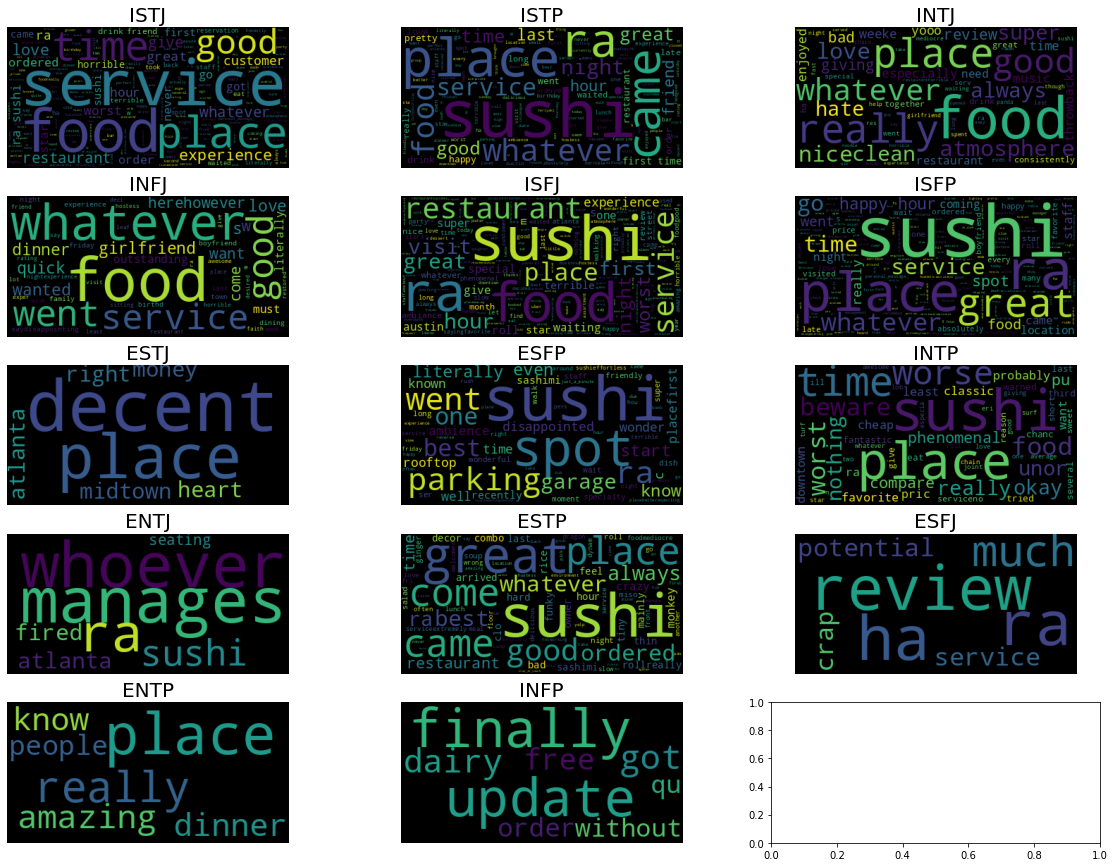

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
<command-4270272540445388> in <module>
      7 for i in range(5):
      8     for j in range(3):
----> 9         c_type = labels[i*col+j]
     10         c_ax = ax[i][j]
     11         df1 = Reviews_pdf[Reviews_pdf['personality'] == c_type]

IndexError: index 14 is out of bounds for axis 0 with size 14

In [0]:
# wordcloud of the most frequently used words by each personality
labels = Reviews_pdf['personality'].unique()
#test_df=Reviews_pdf[Reviews_pdf['stars']<=int(getArgument('stars_filter_below'))][Reviews_pdf['stars']>=int(getArgument('stars_filter_above'))]
row, col = 5,3
wc = WordCloud(stopwords = STOPWORDS)
fig, ax = plt.subplots(5,3, figsize=(20,15))
for i in range(5):
    for j in range(3):
        c_type = labels[i*col+j]
        c_ax = ax[i][j]
        df1 = Reviews_pdf[Reviews_pdf['personality'] == c_type]
        wordc = wc.generate(df1['text_syntatics_cleaned'].to_string())
        c_ax.imshow(wordc)
        c_ax.axis('off')
        c_ax.set_title(label=c_type,fontdict = {'fontsize': 20})


